In [3]:
import pandas as pd
import numpy as np
import streamlit as st
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [4]:
data = pd.read_csv('kidney_disease.csv')
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
data.rename(columns={'bp': 'blood_pressure', 'sg': 'specific gravity','al':'albumin','su':'sugar','rbc':'red blood cells',
                     'pc':'pus cell','pcc':'pus cell clumps','ba':'bacteria','bgr':'blood glucose random','bu':'blood urea',
                     'sc':'serum creatinine','sod':'sodium','pot':'potassium','hemo':'hemoglobin','pcv':'packed cell volume',
                     'wc':'white blood cell count','rc':'red blood cell count','htn':'hypertension','dm':'diabetes mellitus',
                     'cad':'coronary artery disease','appet':'appetite','pe':'pedal edema','ane':'anemia','classification':'classes'},inplace=True)
data.head()

,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,classes
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


<Axes: xlabel='classes', ylabel='count'>

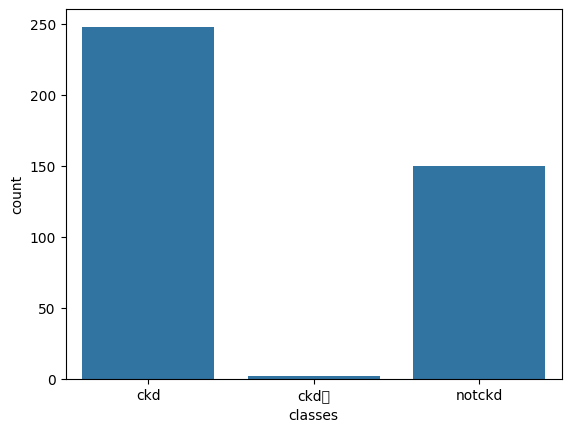

In [6]:
sns.countplot(x = data['classes'])

In [7]:
# We want to remove the 'ckd\t' class becuase of its imbalance
data = data.loc[data['classes'] != 'ckd\t']
data['classes'].value_counts()

classes
ckd       248
notckd    150
Name: count, dtype: int64

<Axes: xlabel='classes', ylabel='count'>

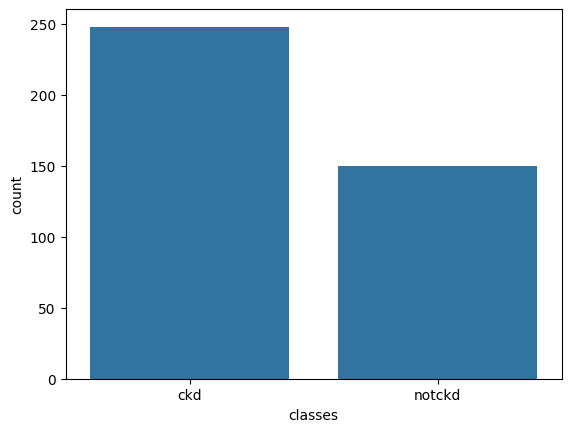

In [8]:
sns.countplot(x = data['classes'])

In [9]:
df = data.copy()

In [10]:
df.isnull().sum()

id                           0
age                          9
blood_pressure              12
specific gravity            46
albumin                     45
sugar                       48
red blood cells            151
pus cell                    64
pus cell clumps              4
bacteria                     4
blood glucose random        44
blood urea                  19
serum creatinine            17
sodium                      87
potassium                   88
hemoglobin                  51
packed cell volume          69
white blood cell count     105
red blood cell count       129
hypertension                 2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
classes                      0
dtype: int64

In [11]:
categoricals = df.select_dtypes(include = ['object', 'category'])
numericals = df.select_dtypes(include = 'number')

print(f"\t\tCategorical Columns")
display(categoricals.head())
print(f"\n\t\tNumerical Columns")
display(numericals.head())

		Categorical Columns


,red blood cells,pus cell,pus cell clumps,bacteria,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,classes
0,NaN,normal,notpresent,notpresent,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,38,6000,NaN,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,35,7300,4.6,no,no,no,good,no,no,ckd



		Numerical Columns


,id,age,blood_pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin
0,0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4
1,1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3
2,2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6
3,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2
4,4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6


In [12]:
def converter(dataframe, column_name, new_name):
    dataframe[new_name] = dataframe[column_name].str.extract(r'(\d+)')  # Extract all numericals from the column and save it to a new column
    dataframe[new_name] = dataframe[new_name].astype(float)  # Turn the new column to a numerical datatype
    dataframe.drop(column_name, axis=1, inplace=True)  # Drop the column we don't need
    return dataframe  # Return the modified dataframe

converter(df, 'packed cell volume', 'packed_cell_volume')
converter(df, 'white blood cell count', 'white_blood_cell_count')
converter(df, 'red blood cell count', 'red_blood_cell_count')


,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,classes,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,yes,yes,no,good,no,no,ckd,44.0,7800.0,5.0
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,no,no,no,good,no,no,ckd,38.0,6000.0,NaN
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,no,yes,no,poor,no,yes,ckd,31.0,7500.0,NaN
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,yes,no,no,poor,yes,yes,ckd,32.0,6700.0,3.0
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,no,no,no,good,no,no,ckd,35.0,7300.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,no,no,no,good,no,no,notckd,47.0,6700.0,4.0
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,no,no,no,good,no,no,notckd,54.0,7800.0,6.0
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,no,no,no,good,no,no,notckd,49.0,6600.0,5.0
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,no,no,no,good,no,no,notckd,51.0,7200.0,5.0


In [13]:
# Select your strategy to handle missing values, and tell us why you had made that choice.
for i in df.columns: # ------------------------------------------------------- Iterate through the ds columns
    if ((df[i].isnull().sum()/ len(df)) * 100) > 50: # --------------------- If the missing value of a column is above 30%
        df.drop([i], axis = 1, inplace = True) # ----------------------------- Drop the column

    elif df[i].dtypes == 'O': # ---------------------------------------------- Or if its not above 30%, and its categorical
        df[i].fillna(df[i].mode()[0], inplace = True) # -------------------- fill the missing value with the mode

    else:
        df[i].fillna(df[i].median(), inplace = True) # --------------------- We are left with only numerical ds, fill the missing with median

df.isnull().sum()
# cleaning the data, because some columns has missing values

# we clean categorical with mode and
# median with numerical

id                         0
age                        0
blood_pressure             0
specific gravity           0
albumin                    0
sugar                      0
red blood cells            0
pus cell                   0
pus cell clumps            0
bacteria                   0
blood glucose random       0
blood urea                 0
serum creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
hypertension               0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
classes                    0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
dtype: int64

In [14]:
df.drop('id', axis = 1, inplace = True)
df.head()

,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,classes,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,yes,yes,no,good,no,no,ckd,44.0,7800.0,5.0
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,121.0,...,no,no,no,good,no,no,ckd,38.0,6000.0,4.0
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,no,yes,no,poor,no,yes,ckd,31.0,7500.0,4.0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,yes,no,no,poor,yes,yes,ckd,32.0,6700.0,3.0
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,no,no,no,good,no,no,ckd,35.0,7300.0,4.0


In [15]:
# PREPROCESSSING
# Standardization
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
encoder = LabelEncoder()

for i in numericals.columns: # ................................................. Select all numerical columns
    if i in df.columns: # ...................................................... If the selected column is found in the general dataframe
        df[i] = scaler.fit_transform(df[[i]]) # ................................ Scale it

for i in categoricals.columns: # ............................................... Select all categorical columns
    if i in df.columns: # ...................................................... If the selected columns are found in the general dataframe
        df[i] = encoder.fit_transform(df[i])# .................................. encode it

df.head()

,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,classes,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
0,-0.203752,0.251629,0.419079,0.076553,-0.381362,1,1,0,0,-0.318185,...,1,4,1,0,0,0,0,44.0,7800.0,5.0
1,-2.621803,-1.973889,0.419079,2.361663,-0.381362,1,1,0,0,-0.318185,...,0,3,1,0,0,0,0,38.0,6000.0,4.0
2,0.621924,0.251629,-1.423943,0.838256,2.500578,1,1,0,0,3.691514,...,0,4,1,1,0,1,0,31.0,7500.0,4.0
3,-0.203752,-0.490210,-2.345454,2.361663,-0.381362,1,0,1,0,-0.371293,...,1,3,1,1,1,1,0,32.0,6700.0,3.0
4,-0.026821,0.251629,-1.423943,0.838256,-0.381362,1,1,0,0,-0.517342,...,0,3,1,0,0,0,0,35.0,7300.0,4.0


In [16]:
df.query('classes == 0')

,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,classes,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
0,-0.203752,0.251629,0.419079,0.076553,-0.381362,1,1,0,0,-0.318185,...,1,4,1,0,0,0,0,44.0,7800.0,5.0
1,-2.621803,-1.973889,0.419079,2.361663,-0.381362,1,1,0,0,-0.318185,...,0,3,1,0,0,0,0,38.0,6000.0,4.0
2,0.621924,0.251629,-1.423943,0.838256,2.500578,1,1,0,0,3.691514,...,0,4,1,1,0,1,0,31.0,7500.0,4.0
3,-0.203752,-0.490210,-2.345454,2.361663,-0.381362,1,0,1,0,-0.371293,...,1,3,1,1,1,1,0,32.0,6700.0,3.0
4,-0.026821,0.251629,-1.423943,0.838256,-0.381362,1,1,0,0,-0.517342,...,0,3,1,0,0,0,0,35.0,7300.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,-0.203752,1.735307,0.419079,-0.685150,-0.381362,1,1,0,0,-0.557173,...,1,3,2,1,0,0,0,19.0,7200.0,2.0
246,-0.203752,2.477146,-0.502432,1.599960,-0.381362,0,1,1,0,-0.517342,...,1,3,2,0,0,1,0,26.0,5000.0,2.0
247,0.150109,0.993468,1.340590,0.076553,-0.381362,1,0,0,0,0.066853,...,0,3,1,1,1,1,0,40.0,8000.0,4.0
248,0.444994,-0.490210,-1.423943,0.076553,2.500578,0,0,0,0,3.704791,...,1,4,2,0,0,0,0,37.0,10200.0,4.0


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

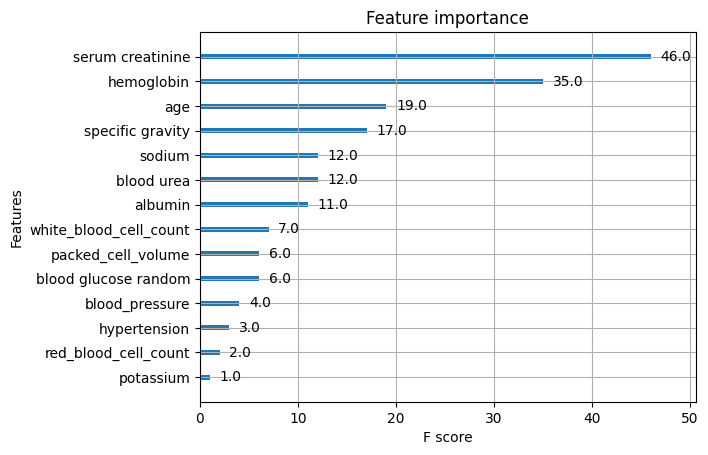

In [17]:
# FEATURE SELECTION

x = df.drop('classes', axis = 1)
y = df['classes']

# - Using XGBOOST to find feature importance
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(x, y)

# Print feature importance scores
xgb.plot_importance(model)

In [18]:
sel_cols = ['serum creatinine', 'hemoglobin', 'age', 'blood urea', 'hypertension']
dx = df[sel_cols]
dx.head()

,serum creatinine,hemoglobin,age,blood urea,hypertension
0,-0.319290,1.047040,-0.203752,-0.420352,1
1,-0.390268,-0.462288,-2.621803,-0.784611,0
2,-0.212823,-1.088107,0.621924,-0.076330,0
3,0.142068,-0.499101,-0.203752,-0.015620,1
4,-0.283801,-0.351850,-0.026821,-0.622718,0


<Axes: xlabel='classes', ylabel='count'>

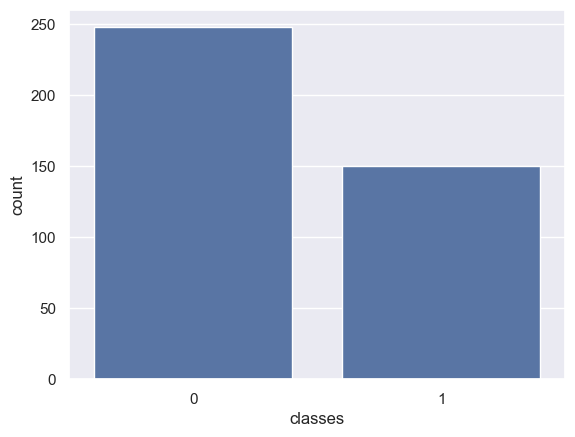

In [19]:
sns.set(style = 'darkgrid')
sns.countplot(x = y)

In [20]:
x = dx
y = df.classes

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 9, stratify = y)

Classification Report on Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       198
           1       1.00      1.00      1.00       120

    accuracy                           1.00       318
   macro avg       1.00      1.00      1.00       318
weighted avg       1.00      1.00      1.00       318



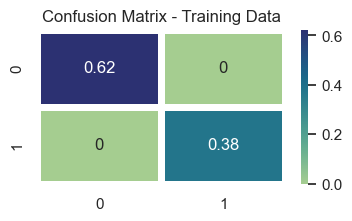


Classification Report on Test Data:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        51
           1       0.97      1.00      0.98        29

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



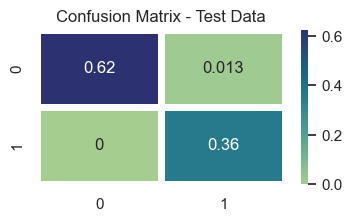

In [21]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=9)
rf_model.fit(xtrain, ytrain)

# Cross-validation on the training set
cross_validation = rf_model.predict(xtrain)

# Print classification report
print("Classification Report on Training Data:")
print(classification_report(cross_validation, ytrain))

# Display confusion matrix
revealer = confusion_matrix(cross_validation, ytrain)
plt.figure(figsize=(4, 2))
sns.set(style='darkgrid')
sns.heatmap(revealer / np.sum(revealer), annot=True, cmap='crest', linewidth=5)
plt.title('Confusion Matrix - Training Data')
plt.show()

# Evaluate the model on the test set
test_predictions = rf_model.predict(xtest)

# Print classification report on test set
print("\nClassification Report on Test Data:")
print(classification_report(test_predictions, ytest))

# Display confusion matrix for the test set
test_confusion_matrix = confusion_matrix(test_predictions, ytest)
plt.figure(figsize=(4, 2))
sns.set(style='darkgrid')
sns.heatmap(test_confusion_matrix / np.sum(test_confusion_matrix), annot=True, cmap='crest', linewidth=5)
plt.title('Confusion Matrix - Test Data')
plt.show()

In [22]:
# model = pickle.dump(model, open('kidney_Disease.pkl', 'wb'))

In [23]:
len(xtrain.columns)

5